# Simple Twitter Analysis
### Includes introductory: tokenization, text preprocessing, collocations, concordance, frequencies and sentiment analysis.
One of my first pieces of code. Code created for the analysis of Mike Pompeo's speech (US Secretary of State) in Greece (2019). Can be used for any corpus of text. A txt file is inputed and then libraries nltk, pandas, matplotlib, gensim, regex and textblob are used for various tasks.

In [2]:
# LIBRARIES IMPORT
import pandas as pd
import os
import re
import nltk
from nltk.probability import FreqDist
import matplotlib as plt
import nltk

In [4]:
# OPENING FILE
f=open('pompeo.txt', encoding='utf-8').read().lower() # CONVERTS ALL LETTER TO LOWERCASE TO REDUCE UNIQUE WORDS

In [5]:
# PRE-PROCESSING
f = re.sub("\n","", f) # REMOVES NEWLINE CHARACTER "\n"
f = re.sub("\([^()]*\)","", f) # REMOVES CONTENT IN PARENTHESES ex. "laughter"

In [6]:
# TOKENIZATION
tokens=nltk.word_tokenize(f)
print(len(tokens), tokens[:20])

5768 ['secretary', 'pompeo', ':', 'so', 'i', 'have', 'some', 'greek', 'words', 'sprinkled', 'throughout', ',', 'and', 'i', '’', 'm', 'terrified', '.', 'but', 'i']


In [7]:
# CONVERSION OF tokens LIST TO NLTK TEXT
text=nltk.Text(tokens)

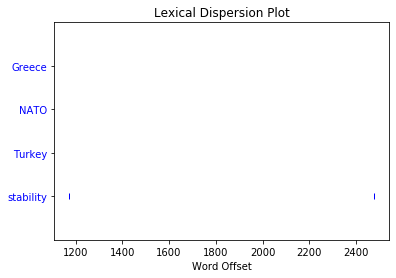

None
Displaying 5 of 5 matches:
.moderator : focusing a bit more on turkey , because i know most people in the
prus expect from the u.s. regarding turkey ? for example , if turkish troops l
cyprus . the u.s. has indeed warned turkey to stop drilling in cyprus , in cyp
is has been ignored . and in fact , turkey plans to start offshore drilling , 
e to communicate that – not only to turkey . we do this all across the world .
None


In [9]:
# GENERATION (and printing) OF DISPERSION PLOT, CONCORDANCE
print(text.dispersion_plot(["Greece", "NATO", "Turkey", "stability"]))
print(text.concordance("Turkey"))

In [10]:
# REMOVES STOPWORDS & PUNCTUATION
from nltk.corpus import stopwords
set(stopwords.words('english'))
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['.',',', "?", "!", "-", "_", "'", "(", "(",":"] # CUSTOM ADD WORDS TO REMOVE
stop_words.extend(newStopWords)
processed_tokens = [w for w in tokens if not w in stop_words] 
processed_tokens = [] 
for w in tokens: 
    if w not in stop_words: 
        processed_tokens.append(w) 

In [11]:
# GETTING THE 50 MOST COMMON WORDS
fdist=FreqDist(processed_tokens)
fdist.most_common(50)

[('’', 198),
 ('–', 56),
 ('greece', 30),
 ('pompeo', 21),
 ('know', 21),
 ('greek', 20),
 ('right', 20),
 ('countries', 18),
 ('think', 17),
 ('people', 17),
 ('world', 17),
 ('secretary', 16),
 ('good', 16),
 ('america', 14),
 ('way', 14),
 ('new', 14),
 ('work', 14),
 ('set', 13),
 ('u.s.', 13),
 ('want', 12),
 ('make', 12),
 ('one', 11),
 ('energy', 11),
 ('united', 11),
 ('help', 11),
 ('see', 10),
 ('nations', 10),
 ('companies', 10),
 ('states', 10),
 ('things', 10),
 ('sure', 10),
 ('together', 9),
 ('president', 9),
 ('“', 9),
 ('”', 9),
 ('create', 9),
 ('china', 9),
 ('government', 9),
 ('thank', 8),
 ('us', 8),
 ('investment', 8),
 ('around', 8),
 (';', 8),
 ('every', 8),
 ('like', 7),
 ('great', 7),
 ('today', 7),
 ('also', 7),
 ('two', 7),
 ('put', 7)]

In [12]:
# GETTING SUMMARY
from gensim.summarization.summarizer import summarize
print(summarize(f))

it’s a game-changer for greece, it’s a game-changer for the region, it’s a game-changer for america.over the last few years, we’ve seen both of our nations recognize that we have to put faith in risk-taking, and not redistribution.and we didn’t come to that conclusion because we were forced to do so.
and i – it’s what i discussed with greece’s leaders earlier today.it begins with a fundamental faith that cultivating and growing our private sector ties works between our two countries.
risking private capital is the ultimate sign of confidence in an economy, and america is prepared to do that by investing here today.we’ve seen it already, companies that are truly betting on greece.
and earlier this week, the prime minister inaugurated a new 300 million euro gas-fired power plant featuring ge technology.this way forward – this way forward is sustained by a stable and predictable rule of law, and basic property rights, and a commitment to honoring them always.and it’s solidified on a perso

In [14]:
# GETTING SENTIMENT
from textblob import TextBlob
blob = TextBlob(f)
print(blob.sentiment)

Sentiment(polarity=0.1837120866077703, subjectivity=0.43850316283769475)
